## Övning 3.4

Uppgiften lyder
<img src="img/exe3.4.png">

In [4]:
import pandas as pd
import numpy as np

stickprov = [[777,790,759,790,770,758,764],[782,773,778,765,789,797,782]]
data = pd.DataFrame(np.transpose(stickprov),columns=["Tomat","Gurka"])
data

,Tomat,Gurka
0,777,782
1,790,773
2,759,778
3,790,765
4,770,789
5,758,797
6,764,782


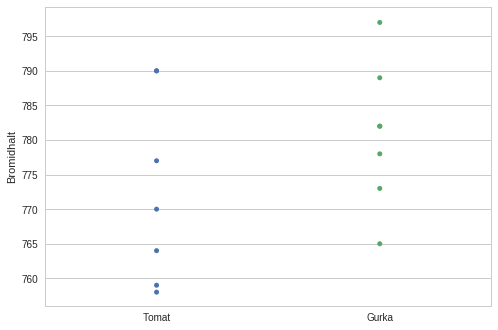

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
sns.stripplot(data=data)
plt.ylabel("Bromidhalt")

In [25]:
antal = data.count()["Tomat"]
medel = data.mean()
medel

Tomat    772.571429
Gurka    780.857143
dtype: float64

In [19]:
var = data.var()
stdv = data.std()
stdv

Tomat    13.562905
Gurka    10.415190
dtype: float64

A. Vi börjar med att göra ett F-test för att se om serierna har signifikant olika varians.

In [13]:
F=var["Tomat"]/var["Gurka"]
F

1.6957857769973659

In [20]:
from scipy.stats import f
f.ppf(1-0.05,antal-1,antal-1)

4.2838657138226388

Eftersom vårt värde $F$ är mindre än det kritiska värdet så kan vi anta att serierna har samma varians och standard avvikelse. Vi skulle även kunnat komma till samma slutsats genom att räkna ut $F$-testets $p$-värde

In [22]:
p=f.sf(F,antal-1,antal-1)
p

0.26856137586864609

B. Vi kan nu göra ett t-test för gemensam varians. Vi börjar med att poola variansen enligt (3.3.1)

In [27]:
pool_var = ((antal-1)*var["Tomat"]+(antal-1)*var["Gurka"])/(2*antal-2)
pool_stdv = np.sqrt(pool_var)
pool_stdv

12.091909928306848

Vi kan nu räkna ut en $t$-värde m.h.a. (3.3.2)

In [32]:
tv = (medel["Tomat"]-medel["Gurka"])/(pool_stdv*np.sqrt(1.0/antal+1.0/antal))
tv

-1.2819440537373596

Detta kan jämföras med ett kritiskt $t$ på en tvåsidig 5%-nivå (= ensidig 2.5%-nivå) med 12 frihetsgrader, $t^{0.975}_{12}$. Samma värde kan även hittas i tabell A.2.

In [30]:
from scipy.stats import t
t.ppf(1-0.025,2*antal-2)

2.1788128296634177

Genomsnitten skiljer sig inte signifikant åt, eftersom abs(tv) < $t^{0.975}_{12}$.

Vi skulle även kunnat räkna ut ett $p$-värde. Observera multiplikation med 2 för att få ett två-sidigt $p$-värde.

In [38]:
p=2*t.sf(abs(tv),2*antal-2)
p

0.22407630703820983